# 로지스틱 회귀 (Logistic Regression)

- 선형 회귀 모형을 **`분류`** 에 적용한 기법
- 데이터가 특정 레이블(클래스)에 소속될 확률을 추정
    - 이 이메일이 스팸일 확률은 얼마
    - 이번 시험에서 합격할 확률은 얼마
- 다른 선형 회귀 모형과는 다르게, 종속변수가 수치형 (numerical)이 아니라 범주형(categorical)
    - 스팸메일, 정상메일
    - 합격, 불합격
- 특정 클래스에 대해서 추정된 확률이 50% 이상이면 해당 데이터를 그 클래스에 속하는 것으로 분류
- 기본적인 로지스틱 회귀는 이항형(binomial)으로서, 종속 변수의 값의 종류는 0과 1의 두 종류
    - 즉, 이 경우의 종속변수는 곧 클래스 그 자체
    - 값이 0이면 음성, 1이면 양성이라고 표현
- 이러한 이진 데이터에 대해서 올바른 결과를 나타내는 선형 회귀를 수행하려면 다음과 같은 성질이 필요
    - 연속적인 단조 증가(monotone increasing) 함수일 것
    - 함수의 결과가 [0, 1] 사이의 값
- 이와 같은 성질을 만족하는 함수를 시그모이드(sigmoid) 함수

$$ y = \frac{1}{1+e^{-x}} $$

## 시그모이드 함수와 확률 추정
- 예측값 t가 시그모이드 함수에 전달되면 결과 값 $\sigma(t)$가 계산되며, 이 값은 추정된 확률 p이다. $(0 \le p \le 1)$
- 추정된 확률 p의 값이 0.5 이상이면 결과를 1으로 분류하고 p의 값이 0.5 미만이면 0으로 분류
- $t \ge 0$ 이면 결과는 양성
- $ t\lt 0$ 이면 결과는 음성

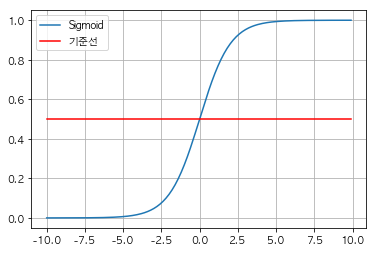

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

X = np.arange(-10,10,0.1)
y = 1 / (1+np.exp(-X))
plt.plot(X,y,label = 'Sigmoid')
plt.plot(X,[0.5 for _ in X],color='red',label = '기준선')
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀 예시

### 붓꽃 데이터를 불러와서 정보를 확인

In [16]:
import sklearn.datasets as d

iris = d.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
print('특성 : ',iris.feature_names)
print('특성 자료형 : ',type(iris.data))
print('클래스 : ',iris.target_names)
print('클래스 자료형 : ',type(iris.target))

특성 :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
특성 자료형 :  <class 'numpy.ndarray'>
클래스 :  ['setosa' 'versicolor' 'virginica']
클래스 자료형 :  <class 'numpy.ndarray'>


### 꽃받침의 길이와 너비 컬럼을 선택하여 산점도를 그린다

In [23]:
c_set = ['blue','red','green']
m_set = ['o','x','^']
l_set = iris.target_names

In [24]:
X = iris.data
y = iris.target

### 산점도를 바탕으로, 각 클래스 분포를 확인한다

In [33]:
set(y)

{0, 1, 2}

In [36]:
x_pts = [X[i,0] for i in range(len(y)) if y[i] == 0]
x_pts[:10]

[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9]

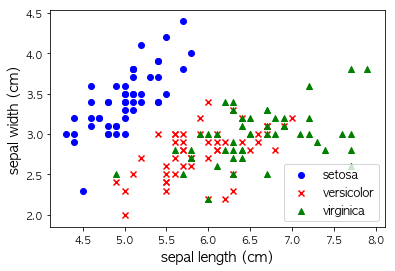

In [30]:
for t in set(y):
    x_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t])

plt.xlabel(iris.feature_names[0],fontsize=14)
plt.ylabel(iris.feature_names[1],fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

### 동일한 방식으로 꽃잎의 길이와 너비 컬럼에 대해 산점도를 그려서 각 클래스 분포를 확인

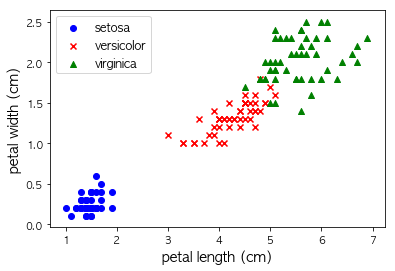

In [32]:
for t in set(y):
    x_pts = [X[i,2] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,3] for i in range(len(y)) if y[i] == t]
    plt.scatter(x_pts,y_pts,color=c_set[t],marker=m_set[t],label=l_set[t])

plt.xlabel(iris.feature_names[2],fontsize=14)
plt.ylabel(iris.feature_names[3],fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

### 사이킷런으로 로지스틱 회귀 수행

#### 데이터를 학습용과 검증용으로 분리

In [41]:
import sklearn.model_selection as ms

In [43]:
X_ptls = X[:,2:4]
X_ptls

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [44]:
y_vgnc = (y==2).astype(np.int) # target이 2인 애들
y_vgnc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
X_train, X_test, y_train, y_test = \
ms.train_test_split(X_ptls,y_vgnc, test_size=0.3, random_state=42)

In [47]:
X_train[0:3,]

array([[3.7, 1. ],
       [5.1, 1.5],
       [5.5, 1.8]])

In [48]:
y_train[0:3,]

array([0, 1, 1])

#### linear_model 모듈에 있는 LogisticRegression을 이용하여 로지스틱 회귀를 수행

In [49]:
import sklearn.linear_model as lm

# 매개변수 solver의 기본값이 추후 사이킷런 0.22 버전에서 ‘lbfgs’로 변경될 예정
# 매개변수 solver는 회귀를 수행할 알고리즘의 이름이다. 기본값은 ‘liblinear’
logr = lm.LogisticRegression(solver='liblinear')

reg = logr.fit(X_train, y_train)

#### 검증 데이터로 예측을 수행한 뒤, metrics 모듈에 있는 accuracy_score 함수를 이용하여 정확도를 계산

In [50]:
import sklearn.metrics as mt
y_pred = reg.predict(X_test)
accuracy = mt.accuracy_score(y_test,y_pred)
print("Accuracy : ",round(accuracy,3))

Accuracy :  0.956


#### 검증 데이터의 예측 결과에 대한 분포를 확인
![image.png](../img/logistic_regression.png)

## 로지스틱 회귀의 특징
- 분석 기법의 이름 자체에 ‘회귀’라는 단어가 들어가 있지만 다른 회귀 모형의 목적과 다르게 ‘분류’를 수행
- 즉, 로지스틱 회귀 모형은 분류기(classifier)이다
- 로지스틱 회귀의 기본 형태는 이진 분류이며, 예측 성능도 일반적으로 우수한 편
- 실행 알고리즘을 다른 것으로 변경하여 다중 클래스들의 분류를 수행

## 다중 클래스 분류를 위한 로지스틱 회귀

- 다중 클래스들에 대한 분류를 수행하는 회귀 모형을 다항(multinomial) 로지스틱 회귀 또는 소프트맥스(softmax) 회귀
- 소프트맥스 회귀를 수행하려면 LogisticRegression의 매개변수 multi_class를 ‘multinomial’로, 매개변수 solver를 ‘lbfgs’로 지정

In [78]:
import sklearn.linear_model as lm

In [79]:
smr = lm.LogisticRegression(multi_class='multinomial',
                            solver='lbfgs')
reg = smr.fit(X_train,y_train)

## 예제

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as d
import sklearn.metrics as mt
import sklearn.linear_model as lm
import sklearn.model_selection as ms

In [93]:
cancer = d.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [94]:
print(cancer.target_names)
set(cancer.target) # WDBC-Malignant / WDBC-Benign

['malignant' 'benign']


{0, 1}

In [95]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [96]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [97]:
X = cancer.data
y = cancer.target

In [98]:
X.shape

(569, 30)

In [99]:
y.shape

(569,)

In [100]:
data = pd.DataFrame(X,columns=cancer.feature_names)
data['target'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [101]:
X_train, X_test, y_train, y_test = \
ms.train_test_split(X,y, test_size=0.3, random_state=42)

In [102]:
reg = lm.LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [103]:
y_pred = reg.predict(X_test)

In [104]:
score = mt.accuracy_score(y_test,y_pred)
score

0.9649122807017544

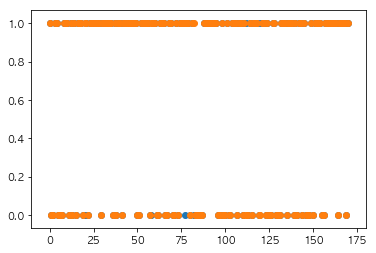

In [110]:
plt.scatter(np.arange(y_test.shape[0]),y_test)
plt.scatter(np.arange(y_test.shape[0]),y_pred)
# plt.scatter(np.arange(y_test.shape[0]),y_test[y_pred!=y_test])
plt.show()